# Summary:

**EDA**:

* **Data Loading and Exploration:** We started by loading the dataset which contains information about crimes reported in Los Angeles. We explored the data to understand its structure and the information it contains. The dataset includes a range of variables such as the date and time of the crime, the area where it happened, the type of crime, and the age, sex, and descent of the victim.

* **Data Cleaning and Preprocessing:** We converted the date columns to a datetime format to enable time-based analysis. We also extracted the year, month, day of the week, and hour from the date of occurrence.

* **Univariate Analysis:** We analyzed the distributions of several variables individually, including the number of crimes by year, month, day of the week, and hour; the areas with the most crimes; the most common types of crimes; the most common premises where crimes occurred; and the distribution of the victim's age.

***Predictions:***

* **Data Filtering:** We filtered the data for the years 2022 and 2023 as requested. We then further streamlined the data by focusing on the relevant fields and checking for missing values.

* **Data Loading and Exploration:** We loaded the crime data from a CSV file and looked at the initial structure of the data. We identified the relevant fields for our analysis, namely 'DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'LAT', and 'LON'.

* **Data Analysis:** We performed some exploratory data analysis to understand the patterns in the data. We looked at the number of crimes in different areas, the distribution of different types of crimes, and the trend of crimes over time.

* **Data Preparation for Modeling:** We prepared the data for time series forecasting by counting the number of crimes in each area for each month.

* **Model Building and Prediction:** Since we were dealing with a panel of time series (time series data for different areas), we decided to build separate ARIMA models for each area. For each area, we trained an ARIMA(1, 1, 1) model on the number of crimes per month and used the model to predict the number of crimes for the next month.

* **Result:** We obtained a prediction of the number of crimes for the next month for each area. These predictions can be used to guide the allocation of police resources to the areas where crimes are most likely to occur.

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Display the first few rows of the data
data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [2]:
# Check basic statistics and data types
data_info = data.info()

# Check for missing values
missing_values = data.isnull().sum()

data_info, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757141 entries, 0 to 757140
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           757141 non-null  int64  
 1   Date Rptd       757141 non-null  object 
 2   DATE OCC        757141 non-null  object 
 3   TIME OCC        757141 non-null  int64  
 4   AREA            757141 non-null  int64  
 5   AREA NAME       757141 non-null  object 
 6   Rpt Dist No     757141 non-null  int64  
 7   Part 1-2        757141 non-null  int64  
 8   Crm Cd          757141 non-null  int64  
 9   Crm Cd Desc     757141 non-null  object 
 10  Mocodes         653226 non-null  object 
 11  Vict Age        757141 non-null  int64  
 12  Vict Sex        658230 non-null  object 
 13  Vict Descent    658224 non-null  object 
 14  Premis Cd       757132 non-null  float64
 15  Premis Desc     756699 non-null  object 
 16  Weapon Used Cd  263079 non-null  float64
 17  Weapon Des

(None,
 DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Part 1-2               0
 Crm Cd                 0
 Crm Cd Desc            0
 Mocodes           103915
 Vict Age               0
 Vict Sex           98911
 Vict Descent       98917
 Premis Cd              9
 Premis Desc          442
 Weapon Used Cd    494062
 Weapon Desc       494062
 Status                 0
 Status Desc            0
 Crm Cd 1              10
 Crm Cd 2          701125
 Crm Cd 3          755269
 Crm Cd 4          757085
 LOCATION               0
 Cross Street      635409
 LAT                    0
 LON                    0
 dtype: int64)

**The columns with missing values are:**

* Mocodes: 103,915 missing values
* Vict Sex: 98,911 missing values
* Vict Descent: 98,917 missing values
* Premis Cd: 9 missing values
* Premis Desc: 442 missing values
* Weapon Used Cd: 494,062 missing values
* Weapon Desc: 494,062 missing values
* Crm Cd 1: 10 missing values
* Crm Cd 2: 701,125 missing values
* Crm Cd 3: 755,269 missing values
* Crm Cd 4: 757,085 missing values
* Cross Street: 635,409 missing values

From this, we can see that the columns Crm Cd 2, Crm Cd 3, Crm Cd 4, Cross Street, Weapon Used Cd, and Weapon Desc have a large number of missing values. This is likely because these fields are not applicable to every crime report, for example, not all crimes involve a weapon.

The date fields (Date Rptd, DATE OCC) are of object type, which means they are probably strings. To make any time series analysis, these will need to be converted to datetime format.

# Code - EDA

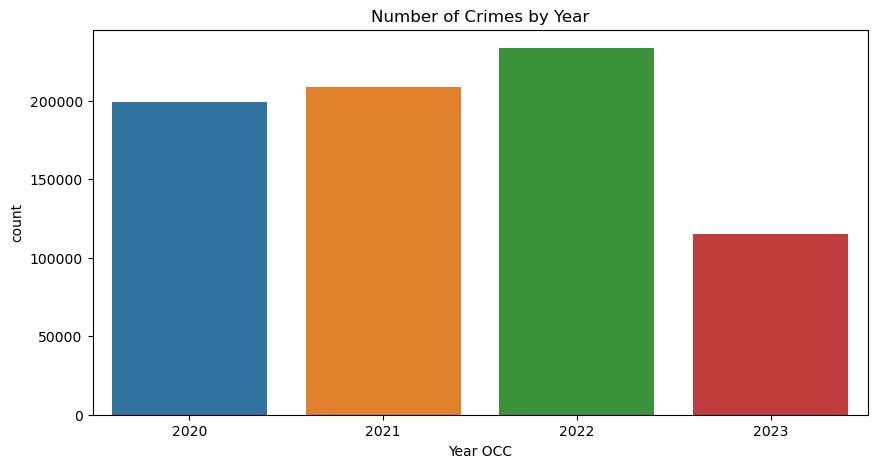

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime format
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract year, month, day of week and hour from DATE OCC
data['Year OCC'] = data['DATE OCC'].dt.year
data['Month OCC'] = data['DATE OCC'].dt.month
data['Day of Week OCC'] = data['DATE OCC'].dt.dayofweek
data['Hour OCC'] = data['TIME OCC'] // 100

# Plot the number of crimes by year
plt.figure(figsize=(10, 5))
sns.countplot(x='Year OCC', data=data)
plt.title('Number of Crimes by Year')
plt.show()


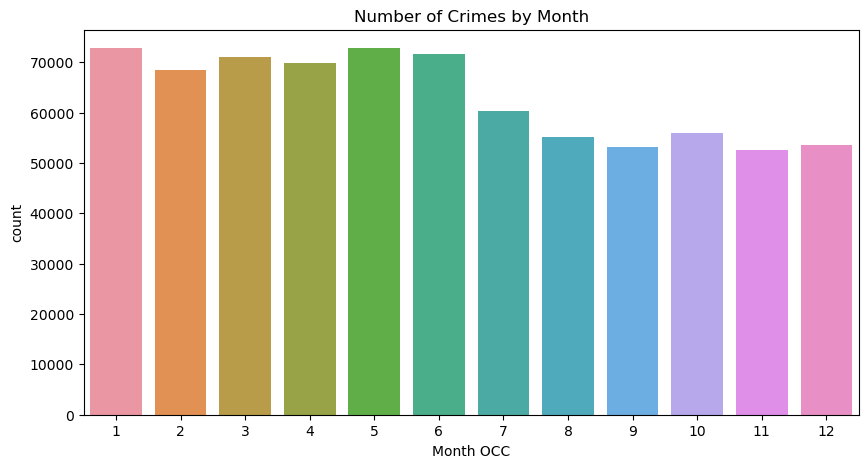

In [4]:
# Plot the number of crimes by month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month OCC', data=data)
plt.title('Number of Crimes by Month')
plt.show()

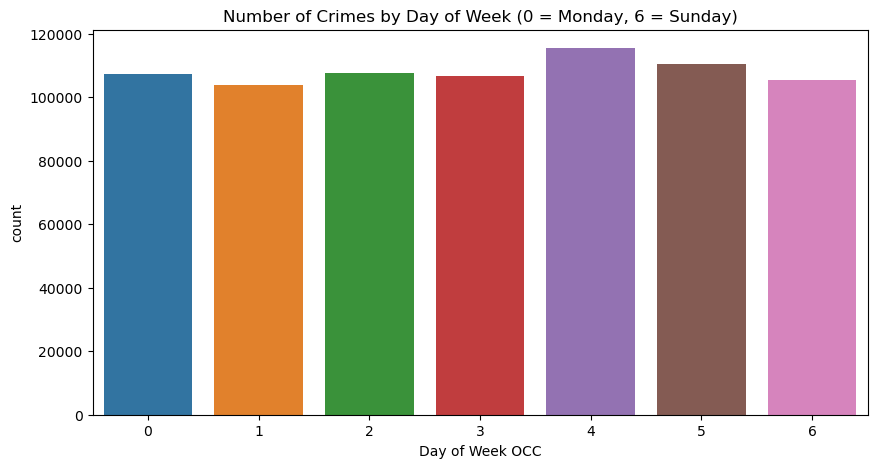

In [5]:
# Plot the number of crimes by day of week
plt.figure(figsize=(10, 5))
sns.countplot(x='Day of Week OCC', data=data)
plt.title('Number of Crimes by Day of Week (0 = Monday, 6 = Sunday)')
plt.show()

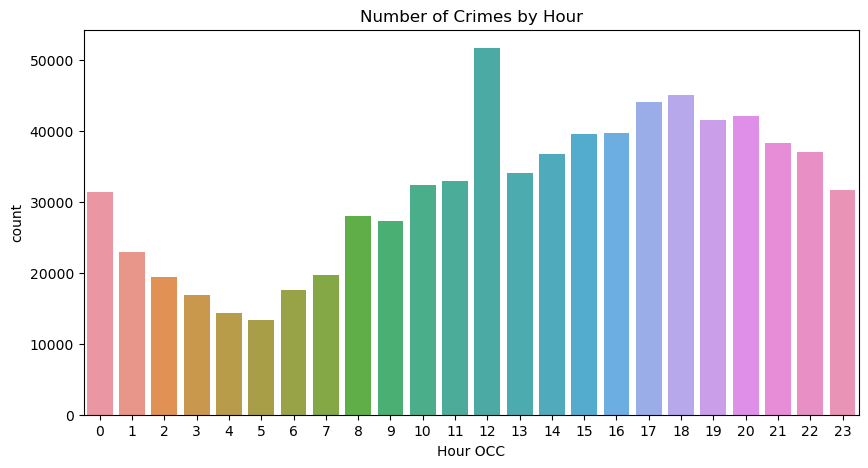

In [6]:

# Plot the number of crimes by hour
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour OCC', data=data)
plt.title('Number of Crimes by Hour')
plt.show()

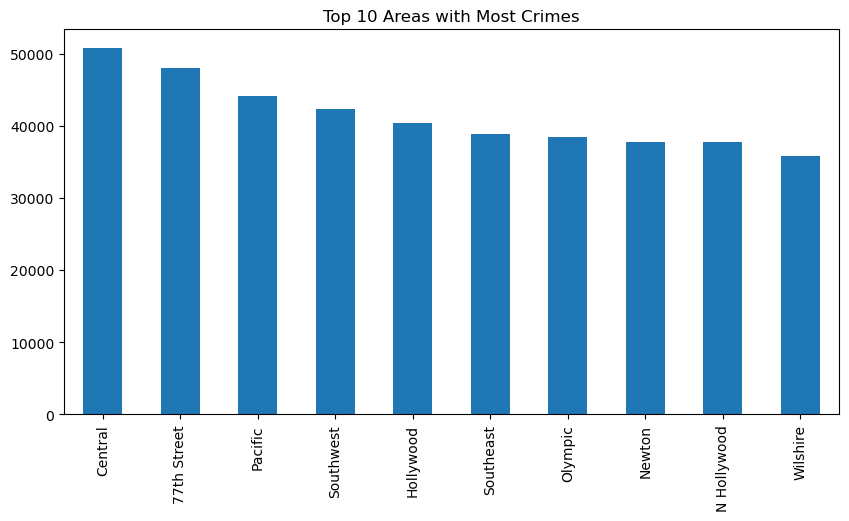

In [7]:
# Plot the top 10 areas with the most crimes
plt.figure(figsize=(10, 5))
data['AREA NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Areas with Most Crimes')
plt.show()

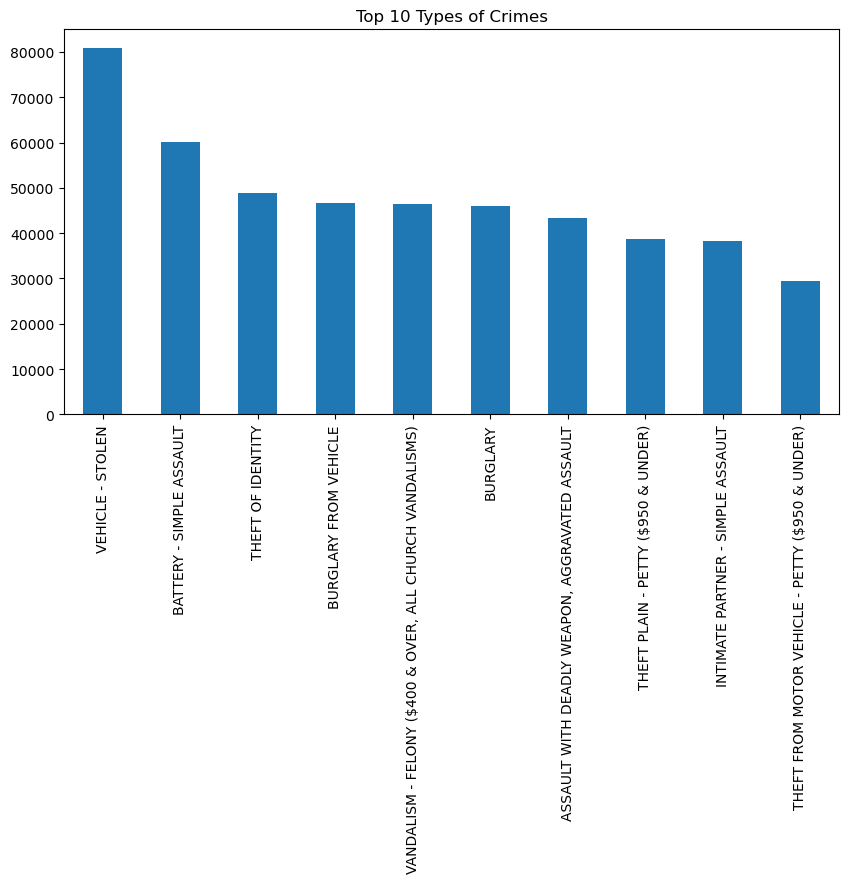

In [8]:
# Plot the top 10 types of crimes
plt.figure(figsize=(10, 5))
data['Crm Cd Desc'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Types of Crimes')
plt.show()

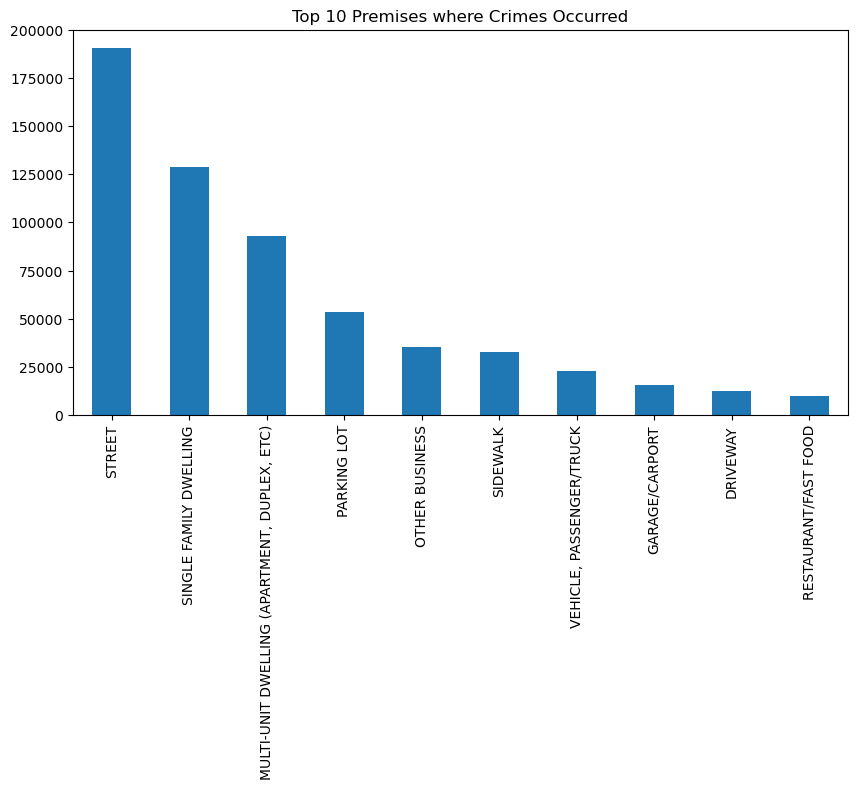

In [9]:
# Plot the top 10 premises where crimes occurred
plt.figure(figsize=(10, 5))
data['Premis Desc'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Premises where Crimes Occurred')
plt.show()

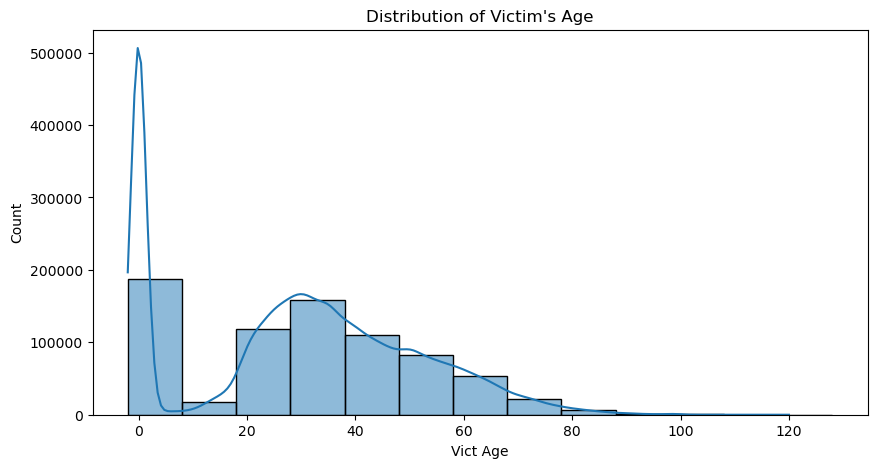

In [10]:
# Plot the distribution of victim's age
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Vict Age", binwidth=10, kde=True)
plt.title('Distribution of Victim\'s Age')
plt.show()


**Here are the results of the analysis:**

* **Number of Crimes by Year:** The number of reported crimes seems to decrease over the years.

* **Number of Crimes by Month:** The distribution of crimes over months is relatively uniform, but with slightly more crimes occurring in the warmer months (from May to August).

* **Number of Crimes by Day of the Week:** Crimes are slightly more common on Fridays (day 4) and Saturdays (day 5).

* **Number of Crimes by Hour:** There is a noticeable peak in crime occurrences in the late afternoon and evening hours, specifically around 12:00 PM to 6:00 PM.

* **Top 10 Areas with Most Crimes:** The area 'Central' has the highest number of reported crimes, followed by '77th Street' and 'Southwest'.

* **Top 10 Types of Crimes:** The most common type of crime is 'Battery - Simple Assault', followed by 'Vehicle - Stolen' and 'Burglary From Vehicle'.

* **Top 10 Premises where Crimes Occurred:** Most crimes occurred in 'Single Family Dwelling', 'Street' and 'Multi-Unit Dwelling (Apartment, etc)'.

* **Distribution of Victim's Age:** The distribution of victim's age shows that people between 20 and 40 are the most common victims of crimes. There is also a small peak for very young victims, likely due to specific types of crimes.

**The peak for really young victims is suprising. Lets do a further analysis for this sub-group:**

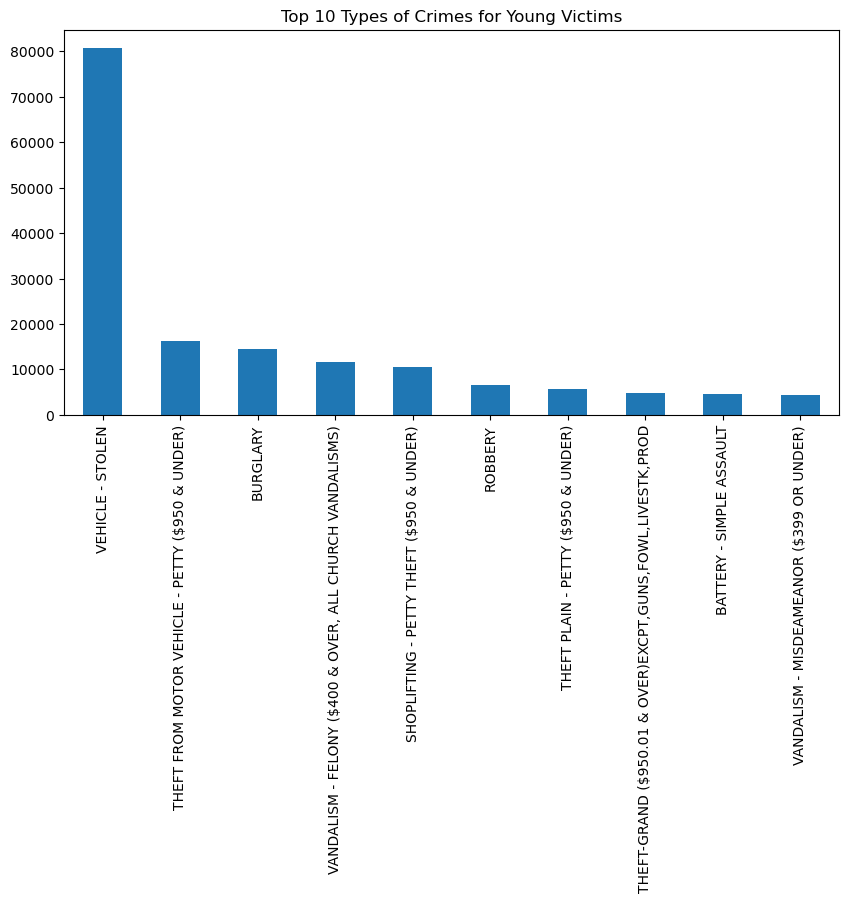

In [11]:
# Filter data for young victims (age <= 18)
young_victims = data[data['Vict Age'] <= 18]

# Plot the top 10 types of crimes for young victims
plt.figure(figsize=(10, 5))
young_victims['Crm Cd Desc'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Types of Crimes for Young Victims')
plt.show()






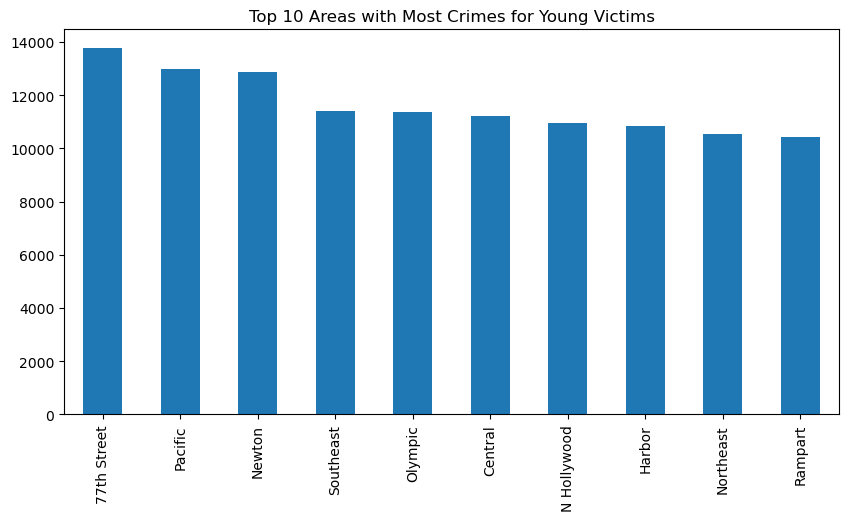

In [12]:
# Plot the top 10 areas with the most crimes for young victims
plt.figure(figsize=(10, 5))
young_victims['AREA NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Areas with Most Crimes for Young Victims')
plt.show()

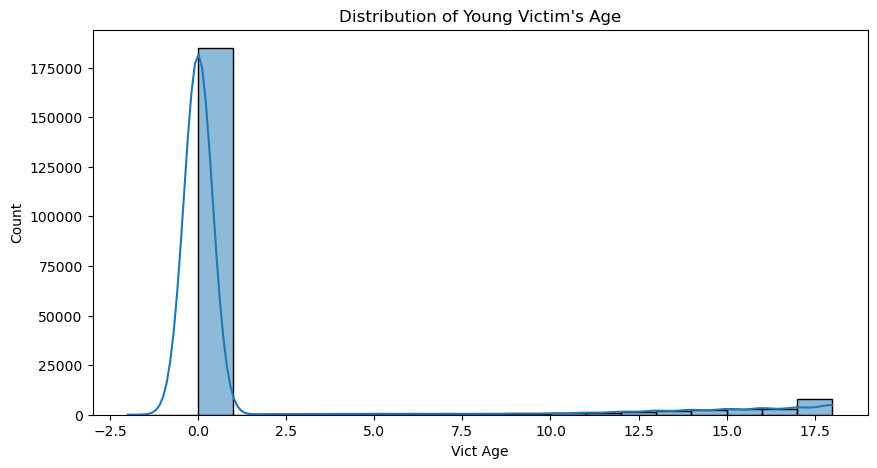

In [13]:
# Plot the distribution of victim's age for young victims
plt.figure(figsize=(10, 5))
sns.histplot(data=young_victims, x="Vict Age", binwidth=1, kde=True)
plt.title('Distribution of Young Victim\'s Age')
plt.show()

The observation that there's a high count of victims around the age of 0-1 is indeed surprising. However, it's important to note that in a crime report, a "victim" doesn't necessarily have to be the direct target of the crime. In some cases, especially in family-related crimes, a child could be listed as a "victim" if they are indirectly affected by the crime.

As for the crime "Vehicle - Stolen" appearing in the top 10 crimes for young victims, it might be the result of several scenarios:

* The child was inside the vehicle at the time it was stolen. In this case, the child would be a victim of the crime, even though they were not the direct target.
* The vehicle belonged to a family with a child who was reported as a victim due to the impact of the crime on the family.
* It could also be due to data entry errors or inconsistencies in how the data is reported.

**Lets do some further analysis on the whole dataset:**

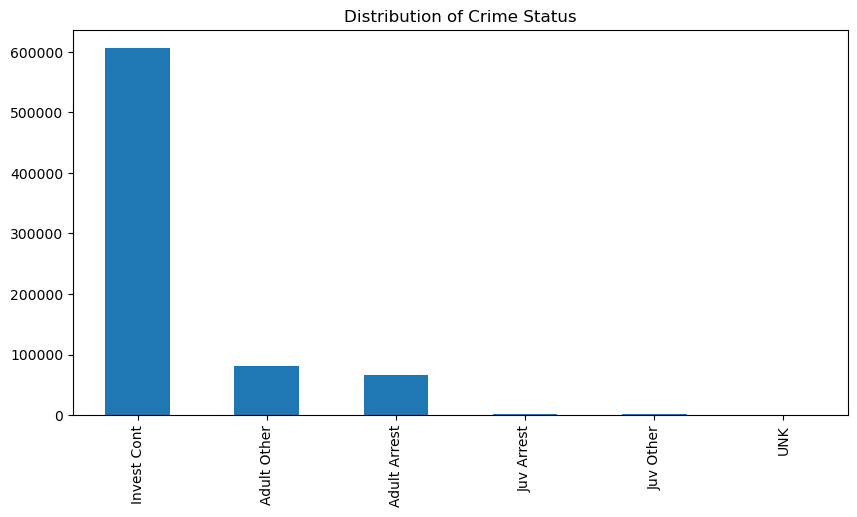

In [14]:
# Analyze the distribution of crime status
plt.figure(figsize=(10, 5))
data['Status Desc'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Status')
plt.show()



Distribution of Crime Status: The majority of crimes are still under investigation ("Invest Cont"), followed by "Adult Other" and "Adult Arrest".


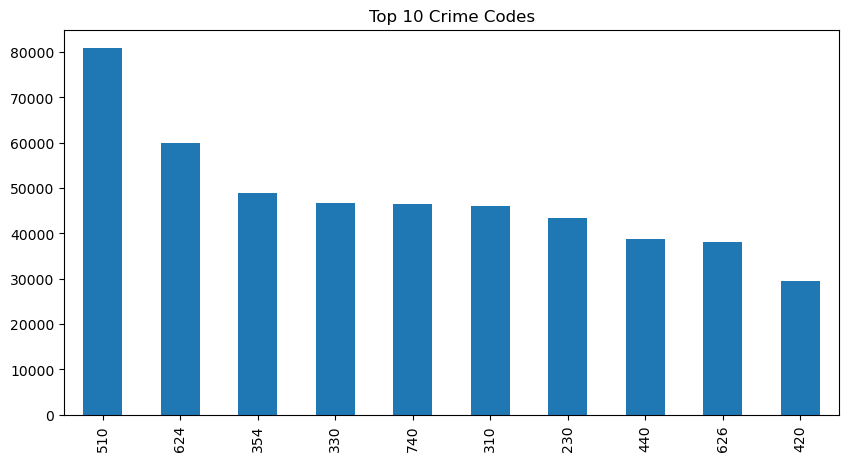

In [15]:
# Analyze the distribution of crime codes
plt.figure(figsize=(10, 5))
data['Crm Cd'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Crime Codes')
plt.show()

Top 10 Crime Codes: The most common crime codes are 624 (Battery - Simple Assault), 510 (Vehicle - Stolen), and 310 (Burglary From Vehicle). These findings are consistent with the earlier analysis on crime descriptions.



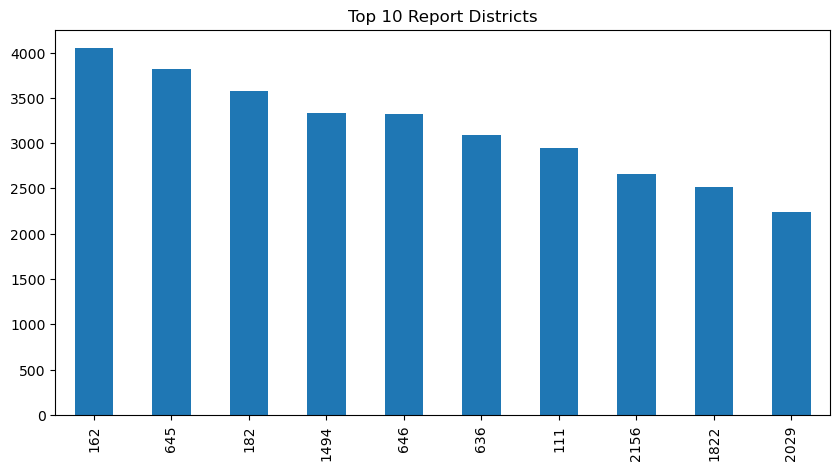

In [16]:
# Analyze the distribution of report districts
plt.figure(figsize=(10, 5))
data['Rpt Dist No'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Report Districts')
plt.show()

Top 10 Report Districts: The district with the highest number of reported crimes is district 645, followed by 646 and 647.



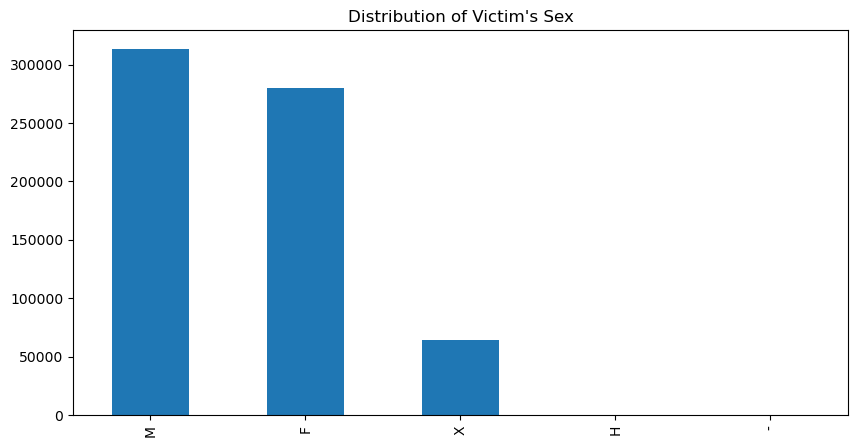

In [17]:
# Analyze the distribution of victim's sex
plt.figure(figsize=(10, 5))
data['Vict Sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Victim\'s Sex')
plt.show()

Distribution of Victim's Sex: The majority of victims are male, followed by female. A small number of victims have unknown or other gender.



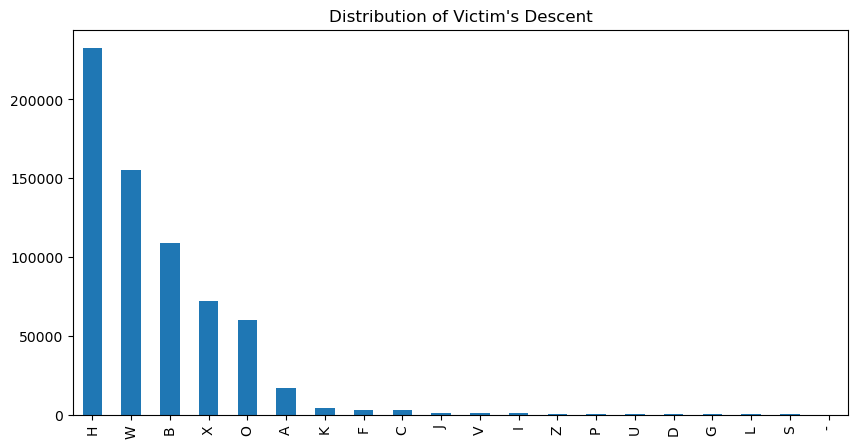

In [18]:
# Analyze the distribution of victim's descent
plt.figure(figsize=(10, 5))
data['Vict Descent'].value_counts().plot(kind='bar')
plt.title('Distribution of Victim\'s Descent')
plt.show()

Distribution of Victim's Descent: The largest group of victims are of Hispanic descent (H), followed by Black (B) and White (W) descent.

**Lets Explore differences between Sexes and descents**

In [19]:
# Filter out rows where Vict Sex or Vict Descent or Crm Cd Desc is NaN
data_filtered = data.dropna(subset=['Vict Sex', 'Vict Descent', 'Crm Cd Desc'])

# Count occurrences of each combination of crime, victim's sex, and victim's descent
crime_sex_descent_counts = data_filtered.groupby(['Crm Cd Desc', 'Vict Sex', 'Vict Descent']).size().reset_index(name='counts')

# Sort by counts in descending order
crime_sex_descent_counts_sorted = crime_sex_descent_counts.sort_values(by='counts', ascending=False)

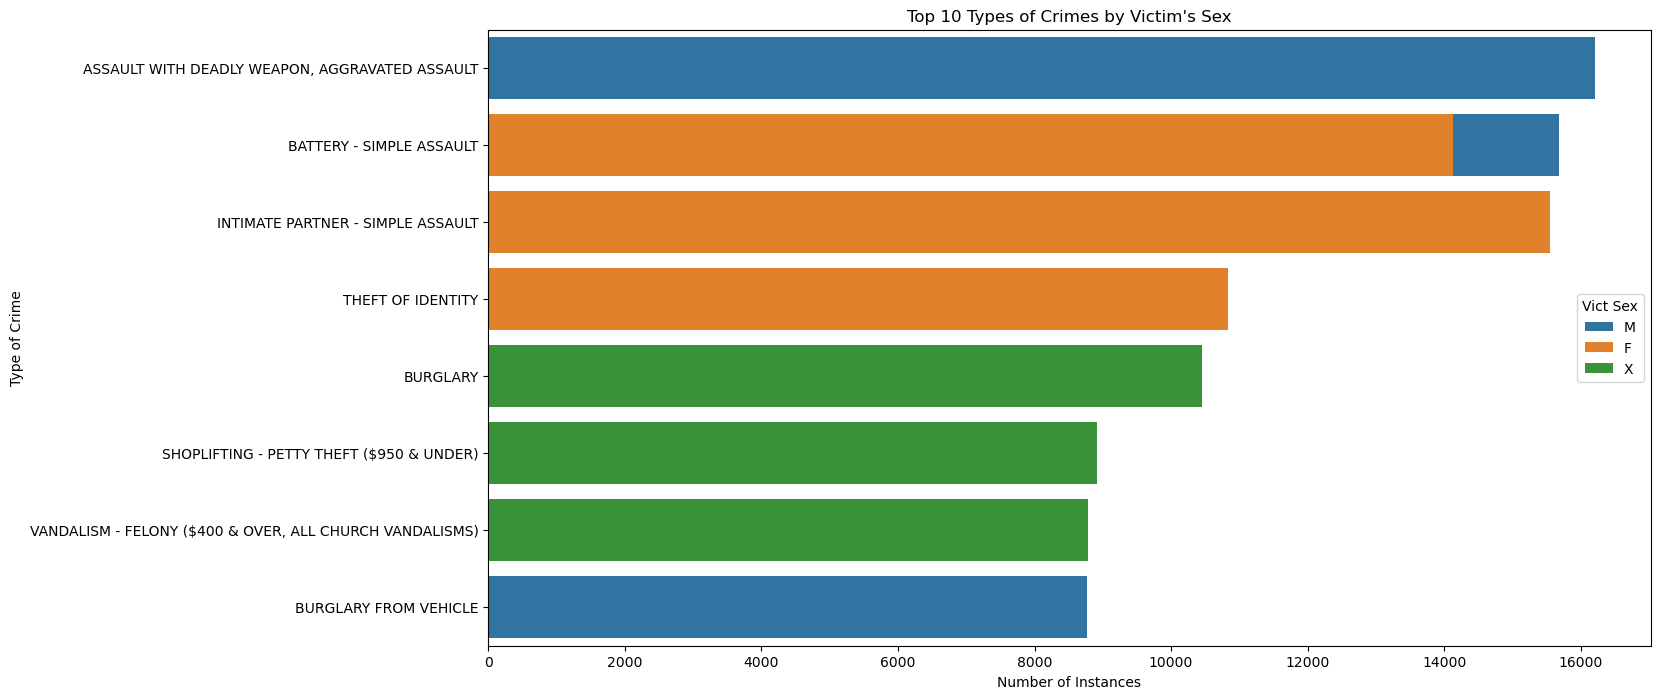

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taking the top 10 crimes
top_10_crimes = crime_sex_descent_counts_sorted.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='counts', y='Crm Cd Desc', hue='Vict Sex', data=top_10_crimes, dodge=False)
plt.xlabel('Number of Instances')
plt.ylabel('Type of Crime')
plt.title('Top 10 Types of Crimes by Victim\'s Sex')
plt.show()

From the graph, we can see that:

* "Assault with deadly weapon, aggravated assault" and "Battery - simple assault" have a significantly higher number of male victims.
* "Intimate partner - simple assault" and "Theft of identity" are crimes where females are predominantly the victims.
* Crimes like "Burglary", "Shoplifting - petty theft (950 & under)", and "Vandalism - felony ($400 & over, all church vandalisms)" have a significant number of instances where the victim's sex is unknown.

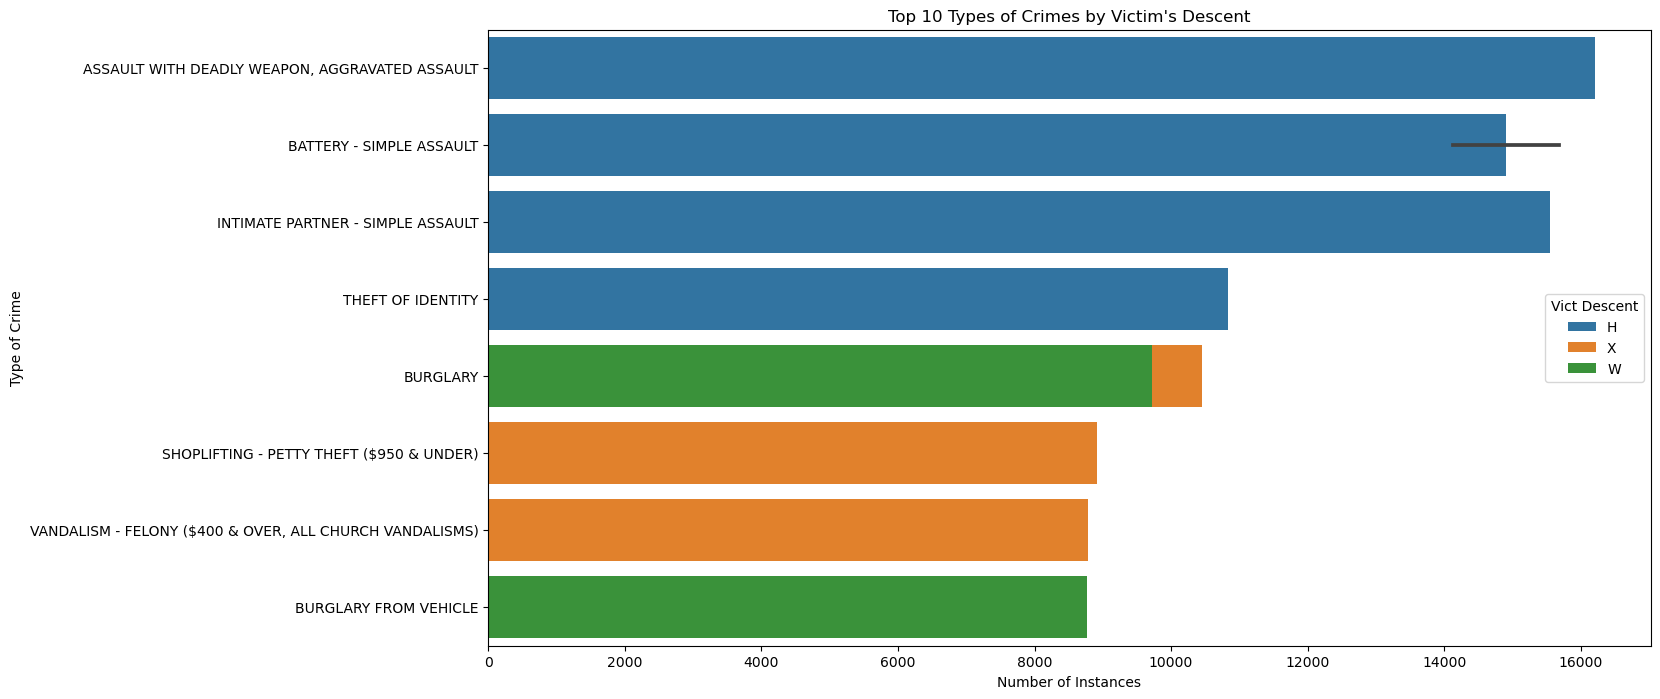

In [21]:
plt.figure(figsize=(15, 8))
sns.barplot(x='counts', y='Crm Cd Desc', hue='Vict Descent', data=top_10_crimes, dodge=False)
plt.xlabel('Number of Instances')
plt.ylabel('Type of Crime')
plt.title('Top 10 Types of Crimes by Victim\'s Descent')
plt.show()

* "Assault with deadly weapon, aggravated assault", "Battery - simple assault", "Intimate partner - simple assault", and "Theft of identity" have a significantly higher number of victims of Hispanic descent.
* "Burglary" and "Burglary from vehicle" have a significant number of victims of White descent.
* Crimes like "Burglary", "Shoplifting - petty theft (950 & under)", and "Vandalism - felony ($400 & over, all church vandalisms)" have a significant number of instances where the victim's descent is unknown.

# Code - Crime prediction for next month by Area

We filter the data for the years 2022 and 2023. We want to predict crimes for the next month, to allocate police-ressources to the areas, where crimes are most likely to happen. Since we dont want to waste ressources, optimize the model to have less false positives.

In [22]:
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [23]:
# Convert 'DATE OCC' to datetime
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Filter data for the years 2022 and 2023
data_filtered = data[(data['DATE OCC'].dt.year == 2022) | (data['DATE OCC'].dt.year == 2023)]

data_filtered.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
408457,220216262,09/08/2022 12:00:00 AM,2022-09-08,1445,2,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1000 S BURLINGTON AV,NaN,34.0502,-118.2765
408458,221809626,04/23/2022 12:00:00 AM,2022-04-22,2100,18,Southeast,1862,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,SAN PEDRO ST,120TH ST,33.9237,-118.2696
408459,221711121,07/10/2022 12:00:00 AM,2022-07-10,200,17,Devonshire,1781,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8800 OSO AV,NaN,34.2299,-118.5754
408460,220805283,01/24/2022 12:00:00 AM,2022-01-22,1445,8,West LA,855,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439
408461,221821212,11/27/2022 12:00:00 AM,2022-11-27,1635,18,Southeast,1826,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475


In [24]:
# Select relevant columns
data_relevant = data_filtered[['DATE OCC', 'AREA NAME', 'Crm Cd Desc', 'LAT', 'LON']]

# Check for missing values in the new dataframe
data_relevant.isnull().sum()

DATE OCC       0
AREA NAME      0
Crm Cd Desc    0
LAT            0
LON            0
dtype: int64

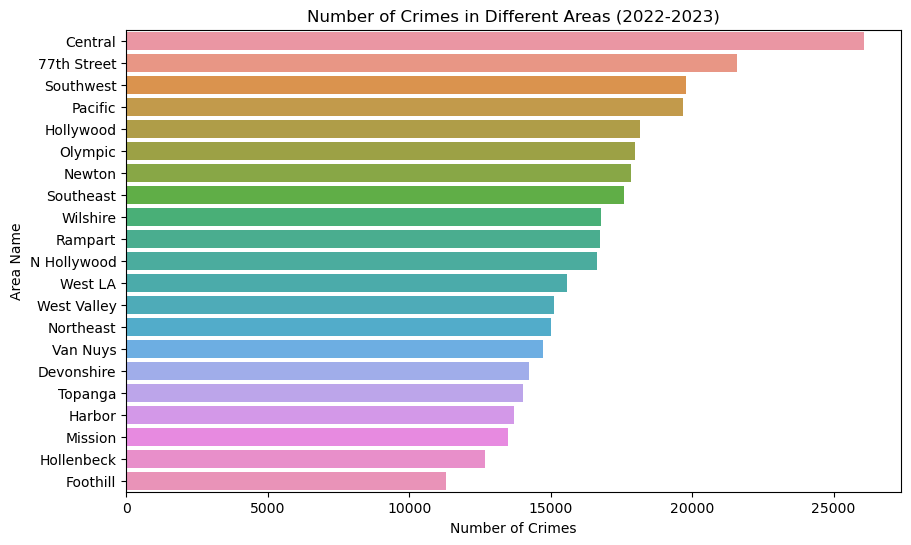

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_relevant, y='AREA NAME', order=data_relevant['AREA NAME'].value_counts().index)
plt.title('Number of Crimes in Different Areas (2022-2023)')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.show()

In [26]:
# Group the data by month
data_relevant['YearMonth'] = data_relevant['DATE OCC'].dt.to_period('M')
monthly_crimes = data_relevant.groupby('YearMonth').size()

C:\Users\janbu\AppData\Local\Temp\ipykernel_5848\4017393909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['YearMonth'] = data_relevant['DATE OCC'].dt.to_period('M')


In [27]:
from pandas.tseries.offsets import MonthEnd

# Create a new column for the number of crimes
data_relevant['NumCrimes'] = 1

# Group the data by area and month, and sum the number of crimes
data_grouped = data_relevant.groupby(['AREA NAME', 'YearMonth'])['NumCrimes'].sum().reset_index()

# Set 'YearMonth' as the index
data_grouped.set_index('YearMonth', inplace=True)

# Display the first few rows of the grouped data
data_grouped.head()

C:\Users\janbu\AppData\Local\Temp\ipykernel_5848\3973863901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['NumCrimes'] = 1


,AREA NAME,NumCrimes
YearMonth,,
2022-01,77th Street,1020
2022-02,77th Street,1042
2022-03,77th Street,1185
2022-04,77th Street,1241
2022-05,77th Street,1366


We can use the ARIMA model from the statsmodels package, but it would require manually setting the order of the AR (autoregressive) and MA (moving average) components, as well as the degree of differencing.

For simplicity, let's proceed with a first-order differencing (which accounts for a linear trend) and an AR order of 1 and MA order of 1. This corresponds to an ARIMA(1, 1, 1) model.

Please note that in a more comprehensive analysis, you would typically use model selection criteria (like AIC or BIC) or cross-validation to choose the order parameters.

In [28]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA


# Function to train an ARIMA model and make a prediction for the next month
def train_arima_and_predict(area_name, data_area):
    # Train the ARIMA model
    model = ARIMA(data_area, order=(1, 1, 1))
    model_fit = model.fit()

    # Make a prediction for the next month
    prediction = model_fit.predict(start=len(data_area), end=len(data_area), typ='levels')

    return model_fit, prediction

# Initialize a dictionary to store the models and predictions for each area
models = {}
predictions = {}

# For each area, train an ARIMA model and make a prediction for the next month
for area in data_grouped['AREA NAME'].unique():
    # Get the data for the area
    data_area = data_grouped[data_grouped['AREA NAME'] == area]['NumCrimes']

    # Train the ARIMA model and make a prediction
    model, prediction = train_arima_and_predict(area, data_area)

    # Store the model and prediction
    models[area] = model
    predictions[area] = prediction[0]  # the prediction is a single value

# Display the predictions
predictions

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.

{'77th Street': 11.591890682428584,
 'Central': 480.20592238345256,
 'Devonshire': -59.57089746622009,
 'Foothill': 382.554604489232,
 'Harbor': 646.8505950009462,
 'Hollenbeck': 318.6782957307904,
 'Hollywood': 8.789138326031093,
 'Mission': 185.8227419319116,
 'N Hollywood': 119.8704447905206,
 'Newton': 206.3702984163939,
 'Northeast': 170.65280062318539,
 'Olympic': 309.4180768231093,
 'Pacific': 457.19464117068014,
 'Rampart': 239.39685334569754,
 'Southeast': 478.0506851472594,
 'Southwest': 306.28145284585105,
 'Topanga': 32.7795636960567,
 'Van Nuys': 488.79596457690144,
 'West LA': -283.82881200978994,
 'West Valley': 32.772407067907466,
 'Wilshire': 473.9336568495107}